In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
import os
import shutil
import glob

In [24]:
#count in number of images in each class 0 -healthy , 1- glioma, 2- meningioma, 4- pituitary
ROOT_DIR = "C:\\Users\\bandy\\Desktop\\Brain Tumour Project'\\Testing"
number_of_images = {}
for dir in os.listdir(ROOT_DIR):
    number_of_images[dir] =len( os.listdir(os.path.join(ROOT_DIR, dir)))

In [25]:
number_of_images.items()

dict_items([('glioma', 240), ('meningioma', 245), ('notumor', 324), ('pituitary', 240)])

In [23]:
import os
import random
import shutil

base_dir =  "C:\\Users\\bandy\\Desktop\\Brain Tumour Project'"
testing_dir = os.path.join(base_dir, 'Testing')
validation_dir = os.path.join(base_dir, 'Validation')

if not os.path.exists(validation_dir):
    os.makedirs(validation_dir)

subfolders = ['glioma', 'meningioma', 'notumor', 'pituitary']

for subfolder in subfolders:
    val_subfolder = os.path.join(validation_dir, subfolder)
    if not os.path.exists(val_subfolder):
        os.makedirs(val_subfolder)
    
    test_subfolder = os.path.join(testing_dir, subfolder)
    
    files = os.listdir(test_subfolder)
    
    num_files_to_move = int(len(files) * 20 / 100)
    files_to_move = random.sample(files, num_files_to_move)
    
    for file_name in files_to_move:
        src_file = os.path.join(test_subfolder, file_name)
        dest_file = os.path.join(val_subfolder, file_name)
        shutil.move(src_file, dest_file)

print("20% of images moved to the validation folder successfully.")


20% of images moved to the validation folder successfully.


In [26]:
#Model Building
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization, GlobalAveragePooling2D
from keras.models import Sequential
from keras.preprocessing.image import load_img, img_to_array
import keras

In [35]:
#CNN MODEL
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape = (512, 512, 3)))

model.add(Conv2D(filters=36, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))


model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Dropout(rate = 0.25))
model.add(Flatten())

model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=4, activation='softmax'))

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 510, 510, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 508, 508, 36)   │         5,220 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 254, 254, 36)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 252, 252, 64)   │        20,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 126, 126, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 124, 124, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 62, 62, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 62, 62, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 492032)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │    31,490,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,590,696 (120.51 MB)

 Trainable params: 31,590,696 (120.51 MB)

 Non-trainable params: 0 (0.00 B)

In [36]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [47]:
import tensorflow 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [125]:
#preparing our data using data generator
def preprocessingImages(path):
    """
    input : path
    output : preprocessed images
    """
    image_data = ImageDataGenerator(zoom_range=0.2,preprocessing_function=preprocess_input, shear_range=0.2, horizontal_flip=True)
    image = image_data.flow_from_directory(directory = path, target_size = (512, 512), batch_size = 32,class_mode = 'categorical' )
    return image

In [126]:
path = "C:\\Users\\bandy\\Desktop\\Brain Tumour Project'\\Training"
train_data = preprocessingImages(path)

Found 5712 images belonging to 4 classes.


In [127]:
def preprocessingImages2(path):
    """
    input : path
    output : preprocessed images
    """
    image_data = ImageDataGenerator(preprocessing_function=preprocess_input)
    image = image_data.flow_from_directory(directory = path, target_size = (512, 512), batch_size = 32,class_mode = 'categorical' )
    return image

In [128]:
path = "C:\\Users\\bandy\\Desktop\\Brain Tumour Project'\\Testing"
test_data = preprocessingImages2(path)

Found 1049 images belonging to 4 classes.


In [129]:
path = "C:\\Users\\bandy\\Desktop\\Brain Tumour Project'\\Validation"
val_data = preprocessingImages2(path)

Found 262 images belonging to 4 classes.


In [66]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

es = EarlyStopping(monitor="val_accuracy", min_delta=0.01, patience=5, verbose=1, mode='auto')

mc = ModelCheckpoint(monitor="val_accuracy",filepath="./bestmodel.keras", mode='auto', save_best_only=True)
cd = [es, mc]

In [68]:
#Training
history = model.fit(x = train_data, steps_per_epoch = 8, epochs = 30, verbose = 1, validation_data = val_data)

Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 50s 6s/step - accuracy: 0.6650 - loss: 0.7914 - val_accuracy: 0.7824 - val_loss: 0.5970
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 44s 6s/step - accuracy: 0.7446 - loss: 0.6331 - val_accuracy: 0.8015 - val_loss: 0.6188
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 44s 6s/step - accuracy: 0.7032 - loss: 0.6705 - val_accuracy: 0.7748 - val_loss: 0.6873
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 45s 6s/step - accuracy: 0.6931 - loss: 0.7783 - val_accuracy: 0.7443 - val_loss: 0.8106
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 48s 6s/step - accuracy: 0.7684 - loss: 0.6258 - val_accuracy: 0.7824 - val_loss: 0.6860
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 47s 6s/step - accuracy: 0.7522 - loss: 0.6014 - val_accuracy: 0.7595 - val_loss: 0.8444
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 47s 6s/step - accuracy: 0.7917 - loss: 0.5871 - val_accuracy: 0.7595 - val_loss: 0.7151
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 48s 6s/step - accuracy: 0.7432 - loss: 0.6644 - val_accuracy: 0.7672 - val_loss: 0.6696
Epoch 9/

In [76]:
h = history.history
h.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Text(0.5, 1.0, 'accuracy vs val_accuracy')

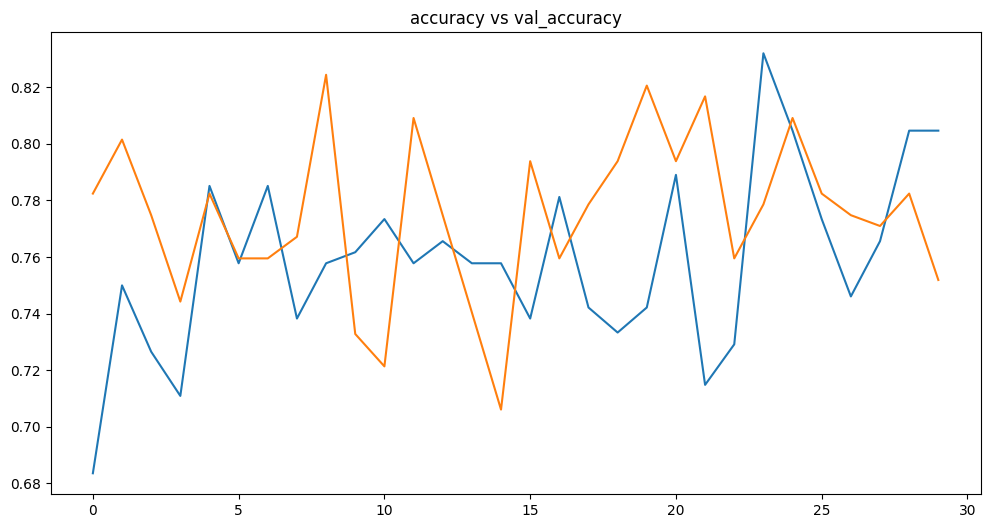

In [88]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.lineplot(data=h['accuracy'], palette='dark')
sns.lineplot(data=h['val_accuracy'])

plt.title('accuracy vs val_accuracy')

Text(0.5, 1.0, 'loss vs val_loss')

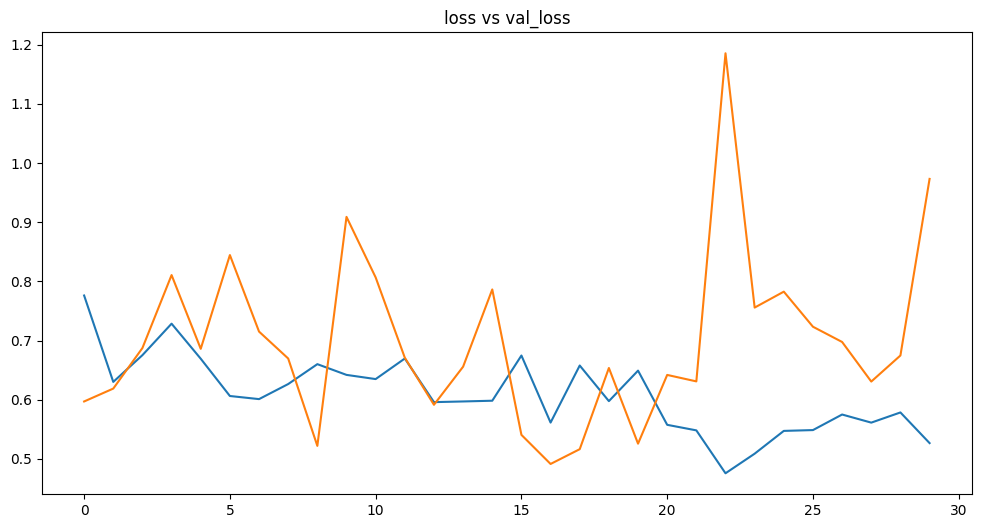

In [89]:
plt.figure(figsize=(12,6))
sns.lineplot(data=h['loss'], palette='dark')
sns.lineplot(data=h['val_loss'])

plt.title('loss vs val_loss')

In [90]:
model.save('tumor_model.keras')

In [91]:
#Model Accuracy

In [93]:
acc = model.evaluate(test_data)[1]

33/33 ━━━━━━━━━━━━━━━━━━━━ 32s 953ms/step - accuracy: 0.7812 - loss: 1.0255


In [94]:
from keras.preprocessing.image import load_img, img_to_array

In [115]:
path = "C:\\Users\\bandy\\Desktop\\Brain Tumour Project'\\Training\\glioma\\Tr-gl_0013.jpg"
img = load_img(path, target_size=(512, 512))
input_arr = img_to_array(img=img)/255

In [117]:
input_arr.shape

(512, 512, 3)

In [118]:
input_arr = np.expand_dims(input_arr, axis=0)

In [119]:
pred = model.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


In [110]:
def predicted_class(arr):
    dic = {0:'Glioma', 1:'Meningioma', 2:'Healthy', 3:'Pituitary'}
    return dic[arr.argmax()]

In [154]:
import pickle
with open('prediction_class.pkl', 'wb') as f:
    pickle.dump(predicted_class, f)

In [120]:
predicted_class(model.predict(input_arr))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


'Glioma'

In [113]:
path = "C:\\Users\\bandy\\Desktop\\Brain Tumour Project'\\Testing\\notumor\\Te-no_0022.jpg"
img = load_img(path, target_size=(512, 512))
input_arr = img_to_array(img=img)/255

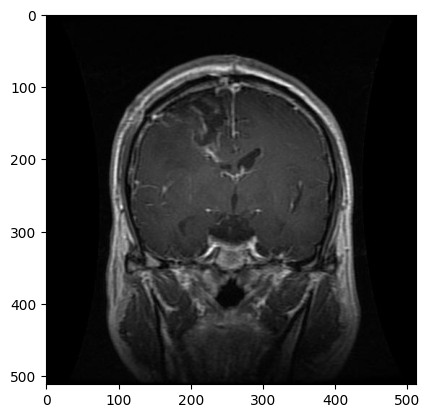

In [116]:
plt.imshow(input_arr)

In [121]:
train_data.class_indices

{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}

In [124]:
from keras.applications.mobilenet import MobileNet, preprocess_input

In [130]:
base_model = MobileNet(input_shape=(512,512, 3), include_top=False)

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 24s 1us/step


In [131]:
for layer in base_model.layers:
    layer.trainable = False

In [135]:
from keras.models import Model
X = Flatten()(base_model.output)
X = Dense(units=4, activation='softmax')(X)

model = Model(base_model.input, X)

In [139]:
model.compile(optimizer='rmsprop', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [141]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
mc = ModelCheckpoint(filepath='best_model.keras', monitor='val_accuracy', verbose=1, save_best_only=True)
es = EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=3, verbose=1)
cb = [mc, es]

In [142]:
hist  = model.fit(train_data, steps_per_epoch=10, epochs=15, validation_data=val_data, validation_steps=16, callbacks=cd)

Epoch 1/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 52s 4s/step - accuracy: 0.4059 - loss: 79.2993 - val_accuracy: 0.6870 - val_loss: 24.0395
Epoch 2/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - accuracy: 0.6666 - loss: 22.2306 - val_accuracy: 0.8397 - val_loss: 4.0847
Epoch 3/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 40s 4s/step - accuracy: 0.7276 - loss: 13.4969 - val_accuracy: 0.7595 - val_loss: 22.9785
Epoch 4/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 40s 4s/step - accuracy: 0.7569 - loss: 12.7874 - val_accuracy: 0.6985 - val_loss: 12.3712
Epoch 5/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 40s 4s/step - accuracy: 0.8313 - loss: 9.4631 - val_accuracy: 0.8168 - val_loss: 7.1874
Epoch 6/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 40s 4s/step - accuracy: 0.7721 - loss: 15.0013 - val_accuracy: 0.8855 - val_loss: 4.8754
Epoch 7/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 40s 4s/step - accuracy: 0.8137 - loss: 11.1345 - val_accuracy: 0.8664 - val_loss: 6.7682
Epoch 8/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 40s 4s/step - accuracy: 0.8711 - loss: 6.8196 - val_accuracy: 0.8015 - 

In [143]:
acc = model.evaluate(test_data)

33/33 ━━━━━━━━━━━━━━━━━━━━ 65s 2s/step - accuracy: 0.8978 - loss: 4.7315


In [144]:
model.save('final_model.keras')

In [145]:
h = hist.history

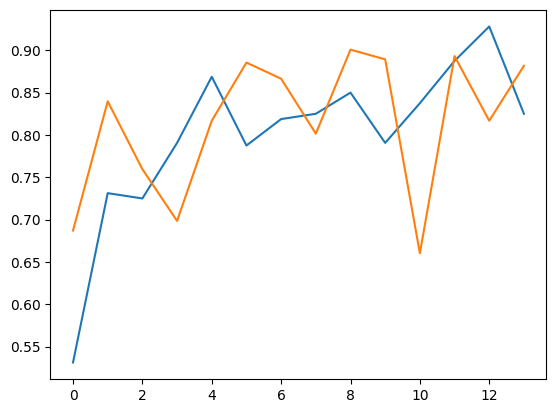

In [147]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'])

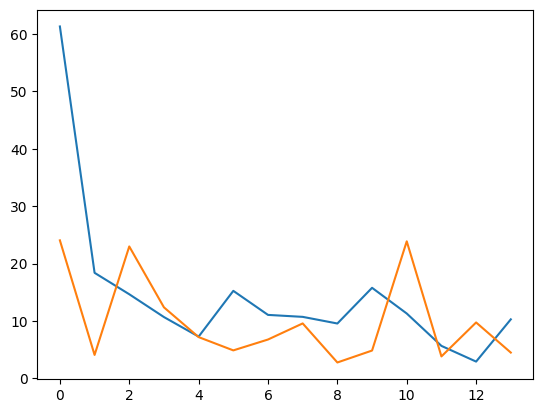

In [148]:
plt.plot(h['loss'])
plt.plot(h['val_loss'])

Model has an accuracy of 89.78%

In [155]:
from PIL import Image
import numpy as np

def resize_image_to_512(image_path, output_path):
    """
    Resizes an image to (512, 512, 3) and saves it.

    Parameters:
    - image_path: str, path to the input image.
    - output_path: str, path to save the resized image.
    """
    # Open the image
    with Image.open(image_path) as img:
        # Convert image to RGB (if not already in RGB mode)
        img = img.convert('RGB')
        
        # Resize image
        img_resized = img.resize((512, 512))
        
        # Save resized image
        img_resized.save(output_path)
        
        # Convert image to numpy array and check its shape
        img_array = np.array(img_resized)
        print(f"Resized image shape: {img_array.shape}")



In [253]:
path = "C:\\Users\\bandy\\Desktop\\Brain Tumour Project'\\Validation\\pituitary\\Te-pi_0108.jpg"

In [295]:
path = "git.jpeg"
img = load_img(path, target_size=(512, 512))
input_arr = img_to_array(img=img)/255

In [297]:
input_arr = np.expand_dims(input_arr, axis=0)

In [298]:
predicted_class(f_model.predict(input_arr))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


'Healthy'

In [299]:
input_arr.shape

(1, 512, 512, 3)

In [290]:
f_model.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


array([[0., 0., 1., 0.]], dtype=float32)

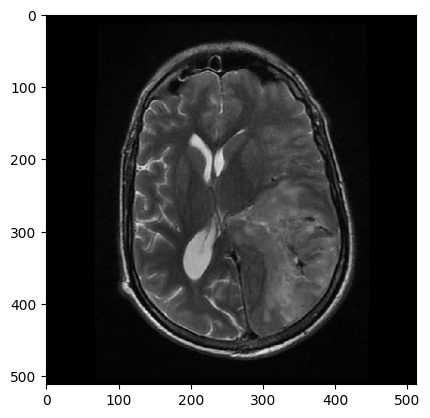

In [296]:
plt.imshow(input_arr)